In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats



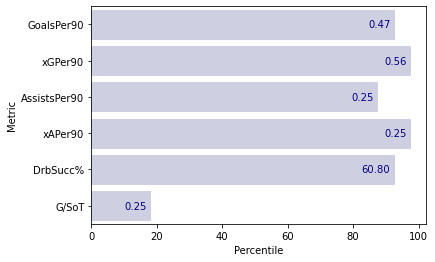

In [4]:
path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202021-2022.csv'
df = pd.read_csv(path)
df = df.fillna(0)

# Filter df on minutes, competition, and position
dfFilt = df[df['Min']>=900]
dfFilt = dfFilt[dfFilt['Comp']=="eng Premier League"]
dfFilt = dfFilt[dfFilt['Main Position'].str.contains('Centre-Forward')]

# get your focal player's data
player = df[df['Player']=='Harry Kane']

# the variables you want on the plot
stat1 = "GoalsPer90"
stat2 = "xGPer90"
stat3 = "AssistsPer90"
stat4 = "xAPer90"
stat5 = "DrbSucc%"
stat6 = "G/SoT"

#Get the specific player's value
x1 = player[stat1].values[0]
x2 = player[stat2].values[0]
x3 = player[stat3].values[0]
x4 = player[stat4].values[0]
x5 = player[stat5].values[0]
x6 = player[stat6].values[0]


pct1 = stats.percentileofscore(dfFilt[stat1],x1)
pct2 = stats.percentileofscore(dfFilt[stat2],x2)
pct3 = stats.percentileofscore(dfFilt[stat3],x3)
pct4 = stats.percentileofscore(dfFilt[stat4],x4)
pct5 = stats.percentileofscore(dfFilt[stat5],x5)
pct6 = stats.percentileofscore(dfFilt[stat6],x6)

bar_df = pd.DataFrame({'Metric': [stat1,stat2,stat3,stat4,stat5,stat6],
                      'Percentile': [pct1,pct2,pct3,pct4,pct5,pct6],
                      'Value': [x1,x2,x3,x4,x5,x6]})


ax = sns.barplot(y='Metric', x='Percentile', data=bar_df,
                color='navy', ec='navy', lw=.5, alpha=.2)

for i in range(len(bar_df)):
    ax.annotate('%.2f' %bar_df['Value'][i], xy=(bar_df['Percentile'][i]-1, i), ha='right', va='center', color='navy')
